In [10]:
# import librray
from rdkit import Chem 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import  Descriptors
from rdkit.Chem import AllChem 
from rdkit.Chem import PandasTools 
from rdkit import DataStructs
import numpy as np 
import pandas as pd 

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [11]:
df = pd.read_csv('../inout/delaney-processed.csv')

In [12]:
# examine first few rows 
df.head() 

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [13]:
df.columns

Index(['Compound ID', 'ESOL predicted log solubility in mols per litre',
       'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors',
       'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area',
       'measured log solubility in mols per litre', 'smiles'],
      dtype='object')

In [17]:
df = df[['Compound ID', 'measured log solubility in mols per litre', 'smiles']]

In [18]:
df.head() 

,Compound ID,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-1.33,c1ccsc1


In [20]:
PandasTools.AddMoleculeColumnToFrame(df,'smiles', 'Molecule')

,Compound ID,measured log solubility in mols per litre,smiles,Molecule
0,Amigdalin,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,
1,Fenfuram,-3.30,Cc1occc1C(=O)Nc2ccccc2,
2,citral,-2.06,CC(C)=CCCC(C)=CC(=O),
3,Picene,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,
4,Thiophene,-1.33,c1ccsc1,

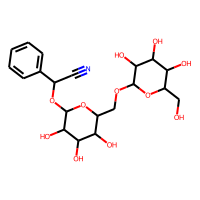
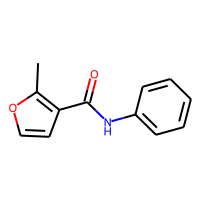
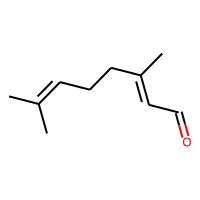
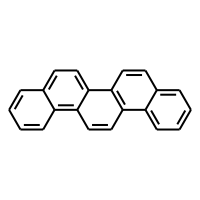
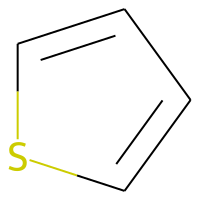

In [21]:
df.head() 

,Compound ID,measured log solubility in mols per litre,Molecule
0,Amigdalin,-0.77,
1,Fenfuram,-3.30,
2,citral,-2.06,
3,Picene,-7.87,
4,Thiophene,-1.33,

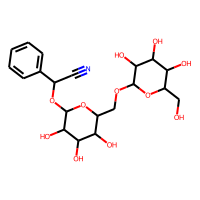
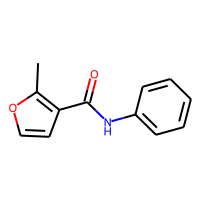
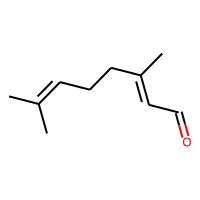
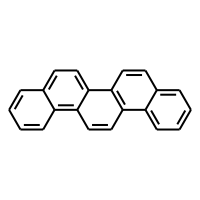
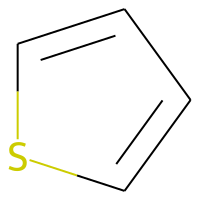

In [23]:
# remove smiles 
df.drop(columns='smiles', inplace=True)
df.head()

In [25]:
df.rename(columns={'measured log solubility in mols per litre':'Soliblity'}, inplace=True)

,Compound ID,Soliblity,Molecule
0,Amigdalin,-0.77,
1,Fenfuram,-3.30,
2,citral,-2.06,
3,Picene,-7.87,
4,Thiophene,-1.33,

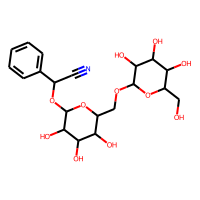
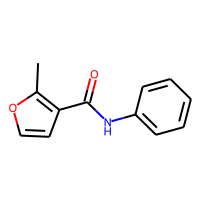
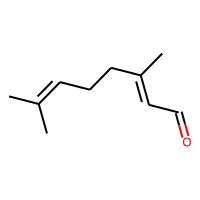
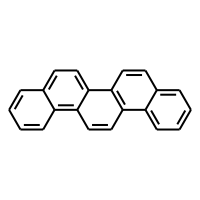
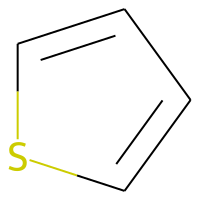

In [26]:
df.head() 

,Compound ID,Soliblity,Molecule,Molecular_Weight
0,Amigdalin,-0.77,,457.432
1,Fenfuram,-3.30,,201.225
2,citral,-2.06,,152.237
3,Picene,-7.87,,278.354
4,Thiophene,-1.33,,84.143

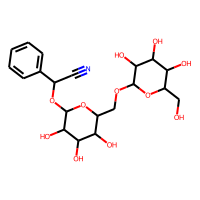
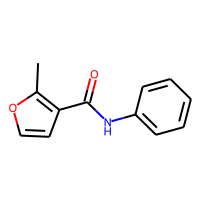
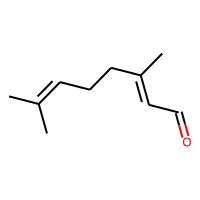
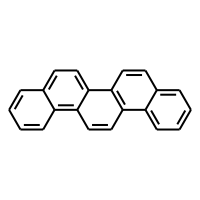
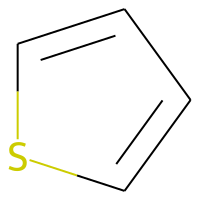

In [27]:
# calculate molecular weight
df['Molecular_Weight'] = [Descriptors.MolWt(mol) for mol in df.Molecule]
df.head() 

,Compound ID,Soliblity,Molecule,Molecular_Weight,MolLogP
0,Amigdalin,-0.77,,457.432,-3.10802
1,Fenfuram,-3.30,,201.225,2.84032
2,citral,-2.06,,152.237,2.87800
3,Picene,-7.87,,278.354,6.29940
4,Thiophene,-1.33,,84.143,1.74810

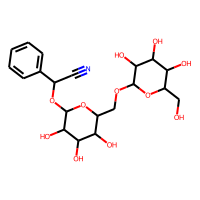
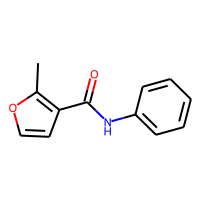
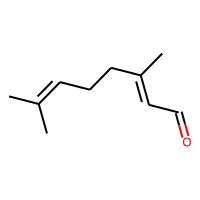
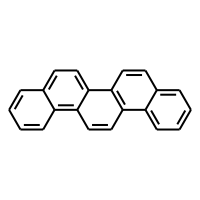
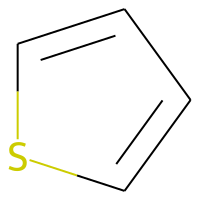

In [29]:
# number of heavey atoms 
df['MolLogP'] = [Descriptors.MolLogP(mol) for mol in df.Molecule]
df.head() 

,Compound ID,Soliblity,Molecule,Molecular_Weight,MolLogP,NumofRotBonds
0,Amigdalin,-0.77,,457.432,-3.10802,7
1,Fenfuram,-3.30,,201.225,2.84032,2
2,citral,-2.06,,152.237,2.87800,4
3,Picene,-7.87,,278.354,6.29940,0
4,Thiophene,-1.33,,84.143,1.74810,0

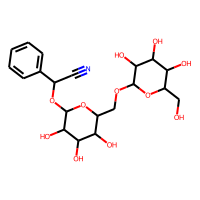
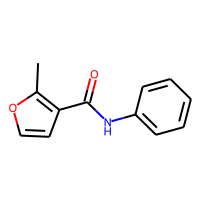
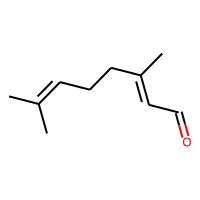
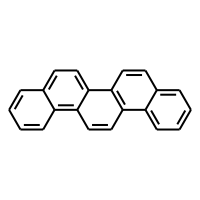
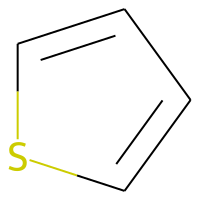

In [30]:
# number of rotatable bonds 
df['NumofRotBonds'] = [Descriptors.NumRotatableBonds(mol) for mol in df.Molecule]
df.head() 

,Compound ID,Soliblity,Molecule,Molecular_Weight,MolLogP,NumofRotBonds,NumofHeavyAtoms
0,Amigdalin,-0.77,,457.432,-3.10802,7,32
1,Fenfuram,-3.30,,201.225,2.84032,2,15
2,citral,-2.06,,152.237,2.87800,4,11
3,Picene,-7.87,,278.354,6.29940,0,22
4,Thiophene,-1.33,,84.143,1.74810,0,5

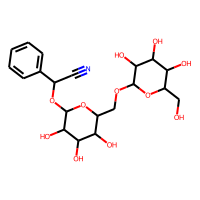
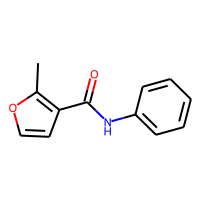
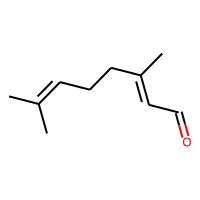
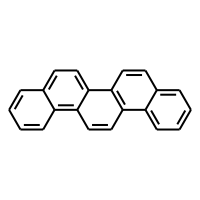
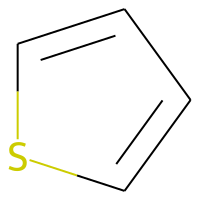

In [31]:
df['NumofHeavyAtoms'] = [Descriptors.HeavyAtomCount(mol) for mol in df.Molecule]
df.head() 

In [32]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count